### A brief summary of the topic (a few sentences): 

I am working on this project with Meera Duggal. We are currently planning to analyze how poverty is correlated with AP Exam enrollment and performance. We will be using data from the Education Data Portal, specifically the Civil Rights Data Collection (CRDC). The AP Exam data has been observed on a school level. 

In this assignment, I have analyzed the AP Exam data that is divided by race and sex. The data is only available from 2011, 2013, 2015, and 2017. The details of the variables can be found here: 
https://educationdata.urban.org/documentation/schools.html#crdc-ap-exams-by-race-and-sex. 

### Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).

In [1]:
import pandas as pd
import numpy as np
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get all AP Exam data sets and put them into dataframe form 
# Years available: 2011, 2013, 2015, 2017
response = requests.get("https://educationdata.urban.org/api/v1/schools/crdc/ap-exams/2011/race/sex/")
results = response.text
data = json.loads(results)
ap_2011 = pd.DataFrame(data['results'])

response = requests.get("https://educationdata.urban.org/api/v1/schools/crdc/ap-exams/2013/race/sex/")
results = response.text
data = json.loads(results)
ap_2013 = pd.DataFrame(data['results'])

response = requests.get("https://educationdata.urban.org/api/v1/schools/crdc/ap-exams/2015/race/sex/")
results = response.text
data = json.loads(results)
ap_2015 = pd.DataFrame(data['results'])

response = requests.get("https://educationdata.urban.org/api/v1/schools/crdc/ap-exams/2017/race/sex/")
results = response.text
data = json.loads(results)
ap_2017 = pd.DataFrame(data['results'])

### Demonstrate the use of Pandas operations to filter out missing data and/or outliers.



#### Clean data for number of exams TAKEN 

In [3]:
# 2011 stores the last columns differently than the other three years 
# Combining students_AP_exam_all with students_AP_exam_oneormore
ap11_exam_1more = ap_2011.loc[(ap_2011['students_AP_exam_all'] >= 0) & 
                              (ap_2011['students_AP_exam_oneormore'] >= 0)].copy()

ap11_exam_1more['students_AP_exam_oneormore'] = \
ap11_exam_1more['students_AP_exam_oneormore'] + ap11_exam_1more['students_AP_exam_all']
ap11_exam_1more['students_AP_pass_oneormore'] = \
ap11_exam_1more['students_AP_pass_oneormore'] + ap11_exam_1more['students_AP_pass_all']

# Put all of our data frames on top of each other 
ap_taken = pd.concat([ap11_exam_1more, ap_2013, ap_2015, ap_2017]).reset_index(drop=True)

# Drop unnecessary columns
ap_taken = ap_taken.drop(labels=['disability', 'lep', 'students_AP_exam_all', 'students_AP_pass_all'], axis=1)


# Filter out missing data in exams taken column 
ap_taken = ap_taken.loc[(ap_taken['students_AP_exam_oneormore'] >= 0)]


# Replace all missing values in passing columns with NaN 
ap_taken.students_AP_pass_oneormore.fillna(value=np.nan, inplace=True)
ap_taken.students_AP_pass_none.fillna(value=np.nan, inplace=True)
ap_taken.students_AP_exam_none.fillna(value=np.nan, inplace=True)


ap_taken.students_AP_pass_oneormore = \
ap_taken.students_AP_pass_oneormore.mask(ap_taken.students_AP_pass_oneormore.lt(0), np.nan)
ap_taken.students_AP_pass_none = \
ap_taken.students_AP_pass_none.mask(ap_taken.students_AP_pass_none.lt(0), np.nan)
ap_taken.students_AP_exam_none = \
ap_taken.students_AP_exam_none.mask(ap_taken.students_AP_exam_none.lt(0), np.nan)

# Change the race column values to be more easily interpretable 
race_dict = {1 : 'White', 2 : 'Black', 3: 'Hispanic', 4 : 'Asian', 
             5: 'Indigenous \nAmerican ', 
             6: "Pacific \nIslander", 
             7 : "Multiracial", 8 : "Nonresident alien", 9 : "Unknown", 
             20 : "Other", 99 : "Total"}
ap_taken = ap_taken.replace({"race": race_dict})

ap_taken

,crdc_id,ncessch,year,fips,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
0,010000500871,010000500871,2011,1,0100005,White,1,8,NaN,7,NaN
1,010000500871,010000500871,2011,1,0100005,Black,1,0,NaN,0,NaN
2,010000500871,010000500871,2011,1,0100005,Hispanic,1,0,NaN,4,NaN
3,010000500871,010000500871,2011,1,0100005,Asian,1,0,NaN,0,NaN
4,010000500871,010000500871,2011,1,0100005,Indigenous \nAmerican,1,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9395,010084000333,010084000333,2017,1,0100840,Asian,1,0,NaN,0,NaN
9396,010084000333,010084000333,2017,1,0100840,Indigenous \nAmerican,1,0,NaN,0,NaN
9397,010084000333,010084000333,2017,1,0100840,Pacific \nIslander,1,0,NaN,0,NaN
9398,010084000333,010084000333,2017,1,0100840,Multiracial,1,0,NaN,0,NaN


#### Clean data for number of exams PASSED

In [4]:
# 2011 stores the last columns differently than the other three years 
# Combining students_AP_exam_all with students_AP_exam_oneormore
ap11_pass_1more = ap_2011.loc[(ap_2011['students_AP_pass_all'] >= 0) & 
                              (ap_2011['students_AP_pass_oneormore'] >= 0)].copy() 

ap11_pass_1more['students_AP_exam_oneormore'] = \
ap11_pass_1more['students_AP_exam_oneormore'] + ap11_pass_1more['students_AP_exam_all']

ap11_pass_1more['students_AP_pass_oneormore'] = \
ap11_pass_1more['students_AP_pass_oneormore'] + ap11_pass_1more['students_AP_pass_all']

# Put all of our data frames on top of each other 
ap_passed = pd.concat([ap11_pass_1more, ap_2013, ap_2015, ap_2017]).reset_index(drop=True)

# Drop unnecessary columns  
ap_passed = ap_passed.drop(labels=['disability', 'lep', 'students_AP_exam_all', 'students_AP_pass_all'], axis=1)
ap_passed

# Filter out any rows that have missing values in the exams passed column 
ap_passed = ap_passed.loc[(ap_passed['students_AP_pass_oneormore'] >= 0)]


# Set missing values in none passed column to NaN 
ap_passed.students_AP_pass_none.fillna(value=np.nan, inplace=True)
ap_passed.students_AP_pass_none = \
ap_passed.students_AP_pass_none.mask(ap_passed.students_AP_pass_none.lt(0), np.nan)


# Change the race column values to be more easily interpretable 
race_dict = {1 : 'White', 2 : 'Black', 3: 'Hispanic', 4 : 'Asian', 
             5: 'Indigenous \nAmerican ', 
             6: "Pacific \nIslander", 
             7 : "Multiracial", 8 : "Nonresident alien", 9 : "Unknown", 
             20 : "Other", 99 : "Total"}
ap_passed = ap_passed.replace({"race": race_dict})

ap_passed

,crdc_id,ncessch,year,fips,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
0,010000700251,010000700251,2011,1,0100007,White,1,23,25.0,118,95
1,010000700251,010000700251,2011,1,0100007,Total,1,32,36.0,162,122
2,010000701456,010000701456,2011,1,0100007,White,1,29,28.0,112,89
3,010000701456,010000701456,2011,1,0100007,Total,1,35,32.0,131,97
4,010000800831,010000800831,2011,1,0100008,White,1,5,37.0,199,164
...,...,...,...,...,...,...,...,...,...,...,...
5637,010063000278,010063000278,2015,1,0100630,Total,1,0,13.0,25,10
5742,010066001491,010066001491,2015,1,0100660,White,1,2,46.0,50,4
5749,010066001491,010066001491,2015,1,0100660,Total,1,2,46.0,54,4
5982,010084000334,010084000334,2015,1,0100840,White,1,0,16.0,17,4


### Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.

#### Analysis of ap_taken 

In [5]:
ap_taken.groupby(['year']).nunique()

,crdc_id,ncessch,fips,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
year,,,,,,,,,,
2011,54,54,1,29,8,1,20,23,50,26
2013,56,56,1,33,8,1,22,31,53,28
2015,70,70,1,34,8,1,27,38,65,31
2017,62,62,1,32,8,1,29,0,78,0


We do not have a consistent amount of observations for each school across the years. Additionally, we currently only have data for male students in Alabama. 
In our future research, we will find the rest of the data. 

In [6]:
ap_taken.groupby(['race']).count()

,crdc_id,ncessch,year,fips,leaid,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
race,,,,,,,,,,
Asian,242,242,242,242,242,242,242,10,242,20
Black,242,242,242,242,242,242,242,64,242,30
Hispanic,242,242,242,242,242,242,242,19,242,11
Indigenous \nAmerican,242,242,242,242,242,242,242,1,242,1
Multiracial,242,242,242,242,242,242,242,4,242,1
Pacific \nIslander,242,242,242,242,242,242,242,0,242,0
Total,242,242,242,242,242,242,242,127,242,99
White,242,242,242,242,242,242,242,105,242,90


We have much more data on white students across all years for the number of students who passed their exams compared to any other race. However, we have data on the number of students who took ap exams for all races. 

In [7]:
taken_year = ap_taken.groupby(['year']).mean()
taken_year

,fips,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
year,,,,,,
2011,1.0,1.0,1.898148,19.256410,9.449074,30.875000
2013,1.0,1.0,2.888393,26.761905,12.156250,27.977011
2015,1.0,1.0,2.167857,24.489796,12.378571,30.336634
2017,1.0,1.0,2.056452,NaN,14.713710,NaN


In [8]:
taken_yrrc = ap_taken.groupby(['year', 'race']).mean()
taken_yrrc

fips  sex  students_AP_exam_none  \
year race                                                       
2011 Asian                    1.0  1.0               0.240741   
     Black                    1.0  1.0               1.444444   
     Hispanic                 1.0  1.0               0.148148   
     Indigenous \nAmerican    1.0  1.0               0.037037   
     Multiracial              1.0  1.0               0.074074   
     Pacific \nIslander       1.0  1.0               0.000000   
     Total                    1.0  1.0               7.592593   
     White                    1.0  1.0               5.648148   
2013 Asian                    1.0  1.0               0.250000   
     Black                    1.0  1.0               1.910714   
     Hispanic                 1.0  1.0               0.107143   
     Indigenous \nAmerican    1.0  1.0               0.035714   
     Multiracial              1.0  1.0               0.178571   
     Pacific \nIslander       1.0  1.0               0.000000   
     Total                    1.0  1.0              11.553571   
     White                    1.0  1.0               9.071429   
2015 Asian                    1.0  1.0               0.285714   
     Black                    1.0  1.0               2.028571   
     Hispanic                 1.0  1.0               0.571429   
     Indigenous \nAmerican    1.0  1.0               0.057143   
     Multiracial              1.0  1.0               0.142857   
     Pacific \nIslander       1.0  1.0               0.028571   
     Total                    1.0  1.0               8.671429   
     White                    1.0  1.0               5.557143   
2017 Asian                    1.0  1.0               0.225806   
     Black                    1.0  1.0               1.709677   
     Hispanic                 1.0  1.0               0.564516   
     Indigenous \nAmerican    1.0  1.0               0.016129   
     Multiracial              1.0  1.0               0.387097   
     Pacific \nIslander       1.0  1.0               0.000000   
     Total                    1.0  1.0               8.225806   
     White                    1.0  1.0               5.322581   

                             students_AP_pass_none  \
year race                                            
2011 Asian                                5.500000   
     Black                               16.000000   
     Hispanic                             4.000000   
     Indigenous \nAmerican                     NaN   
     Multiracial                               NaN   
     Pacific \nIslander                        NaN   
     Total                               23.468750   
     White                               19.360000   
2013 Asian                               16.000000   
     Black                               20.714286   
     Hispanic                             5.500000   
     Indigenous \nAmerican                     NaN   
     Multiracial                          4.000000   
     Pacific \nIslander                        NaN   
     Total                               34.268293   
     White                               26.500000   
2015 Asian                               11.000000   
     Black                               11.714286   
     Hispanic                             8.000000   
     Indigenous \nAmerican                4.000000   
     Multiracial                          5.000000   
     Pacific \nIslander                        NaN   
     Total                               33.333333   
     White                               28.586957   
2017 Asian                                     NaN   
     Black                                     NaN   
     Hispanic                                  NaN   
     Indigenous \nAmerican                     NaN   
     Multiracial                               NaN   
     Pacific \nIslander                        NaN   
     Total                                     NaN   
     White                          

#### Analysis of ap_passed

In [9]:
ap_passed

,crdc_id,ncessch,year,fips,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
0,010000700251,010000700251,2011,1,0100007,White,1,23,25.0,118,95
1,010000700251,010000700251,2011,1,0100007,Total,1,32,36.0,162,122
2,010000701456,010000701456,2011,1,0100007,White,1,29,28.0,112,89
3,010000701456,010000701456,2011,1,0100007,Total,1,35,32.0,131,97
4,010000800831,010000800831,2011,1,0100008,White,1,5,37.0,199,164
...,...,...,...,...,...,...,...,...,...,...,...
5637,010063000278,010063000278,2015,1,0100630,Total,1,0,13.0,25,10
5742,010066001491,010066001491,2015,1,0100660,White,1,2,46.0,50,4
5749,010066001491,010066001491,2015,1,0100660,Total,1,2,46.0,54,4
5982,010084000334,010084000334,2015,1,0100840,White,1,0,16.0,17,4


In [10]:
ap_passed.groupby(['year']).nunique()

,crdc_id,ncessch,fips,leaid,race,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore,students_AP_pass_oneormore
year,,,,,,,,,,
2011,13,13,1,10,5,1,12,16,25,18
2013,34,34,1,22,6,1,19,29,46,28
2015,39,39,1,24,6,1,21,36,56,31


In [11]:
passed_yrrc = ap_passed.groupby(['race']).mean()
passed_yrrc

,year,fips,sex,students_AP_exam_none,students_AP_pass_none,students_AP_exam_oneormore
race,,,,,,
Asian,2013.705882,1.0,1.0,1.294118,15.000000,25.294118
Black,2013.480000,1.0,1.0,3.760000,17.500000,27.120000
Hispanic,2014.000000,1.0,1.0,1.600000,5.000000,7.300000
Indigenous \nAmerican,2013.000000,1.0,1.0,0.000000,NaN,2.000000
Multiracial,2015.000000,1.0,1.0,0.000000,NaN,2.000000
Total,2013.604651,1.0,1.0,14.825581,39.615385,81.093023
White,2013.692308,1.0,1.0,12.743590,32.333333,67.025641


### Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
### Include a short written analysis of your interpretation of the data.

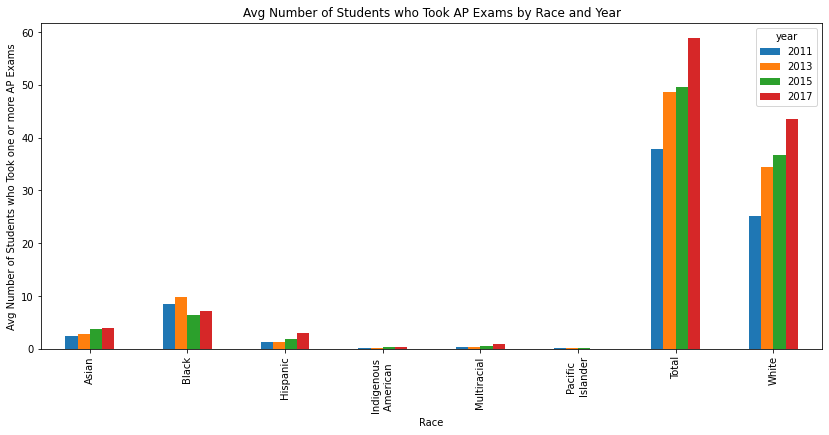

In [12]:
ap_taken.groupby(['race', 'year'])['students_AP_exam_oneormore'].mean().unstack().plot(
    kind='bar', figsize=(14,6), title='Avg Number of Students who Took AP Exams by Race and Year', 
    ylabel='Avg Number of Students who Took one or more AP Exams', xlabel='Race');

While we do have data for every race across each year, most of our data is concerning white students. This may be due the fact that our data currently only contains information from Alabama which has a predominantly white population and much smaller black population and an even smaller population of all other races. In our future analysis, we will be able to see a slightly more evenly number of observations that reflects the population of the United States. 

Throughout the years, we can see an increase in exams taken across each of the races, with the exception of black students. 

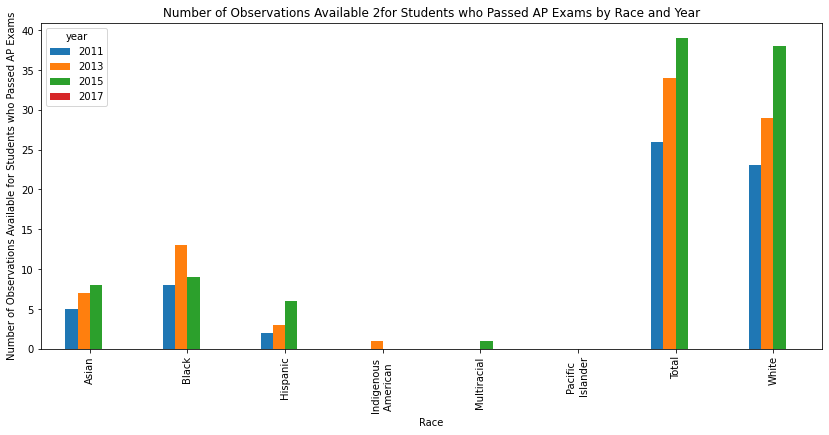

In [13]:
ap_taken.groupby(['race', 'year'])['students_AP_pass_oneormore'].count().unstack().plot(
    kind='bar', figsize=(14,6), title='Number of Observations Available 2for Students who Passed AP Exams by Race and Year', 
    ylabel='Number of Observations Available for Students who Passed AP Exams', xlabel='Race');

As we can see above, there is no information about the number of students who passed AP Exams in 2017. There is also no data concerning this topic for Pacific Islander students and a minimal amount for indigenous american students as well as multiracial students. There is also an increase in data throughout the years. 

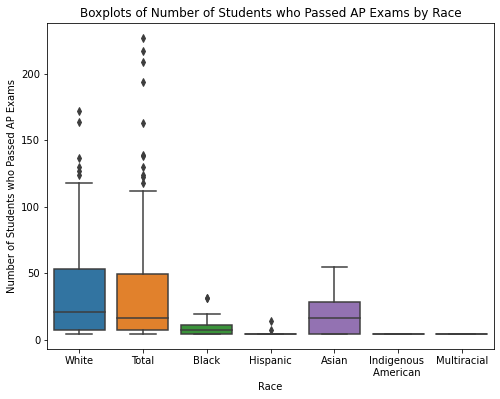

In [14]:
import seaborn as sns 

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=ap_passed, x='race', y='students_AP_pass_oneormore').set(
    xlabel='Race', 
    ylabel='Number of Students who Passed AP Exams',
    title='Boxplots of Number of Students who Passed AP Exams by Race'); 

We can see that the median amount of students passing AP Exams is around the same between white students and asian students. However we need to consider that the amount of data we have is drastically skewed towards white students. Black students have a lower median while the remaining races have not even been sampled enough so that we can observe any additional information. 

### In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.



As mentioned at the beginning of the assignment, our main research question will be: "How poverty is correlated with AP Exam enrollment and performance?" We will also be analyzing how sex and race factors into this question. Time permitting, we may also look into how students who do not speak english as well as students with disabilities are affected by this. We may also analyze how poverty affects student performance on state-wide assessments, class retention, and graduation rates as well. 

Our next steps are to figure out how to access to the full version of the data that I have analyzed above, as well as the additional data sets that will be necessary for our analysis. 
In future analysis, we will also plot our data as percentages of enrollment and number of students who took AP Exams in the first place to get more accurate insight to the distribution of passing scores. We be finding the necessary data to visualize the data in a manner that is more representative of the current state of America's education. We are also planning to visualize this data geographically to see how certain school might be struggling with test performance in certain areas. 
